# Background
In physics, models on a lattice are often studied.  
The structure of the lattice is one of the important physical factors.  
It is useful to be able to generate various lattices easily.  
In addition, it is convenient to be able to define the Hamiltonian of a model on the lattice.
  
- `Lattice` module provides various lattices.
- `FermiHubbardModel` provides the Hamiltonian of the Fermi-Hubbard model (FHM).
- These modules will be added to qiskit-nature.
    - qiskit_nature
        - problems
            - second_quantization
                - electronic
                - vibrational
                - lattice - *Our modules*
                    - lattice
                    - models

# In this demo
- Some standard usages of `LineLattice`, `SquareLattice`, `HyperCubicLattice`, and `TriangularLattice`.
- `FermiHubbardModel` makes the FHM on a given lattice.
- Sequence of steps from creating a lattice to running the Variational Quantum Eigensolver(VQE) of the FHM.

In [1]:
from math import pi
import numpy as np
from qiskit_nature.operators.second_quantization.fermionic_op import FermionicOp
from qiskit_nature.problems.second_quantization.lattice import HyperCubicLattice, LineLattice, SquareLattice, TriangularLattice
from qiskit_nature.problems.second_quantization.lattice import FermiHubbardModel

# `LineLattice`
`LineLattice` provides a one-dimensional lattice.

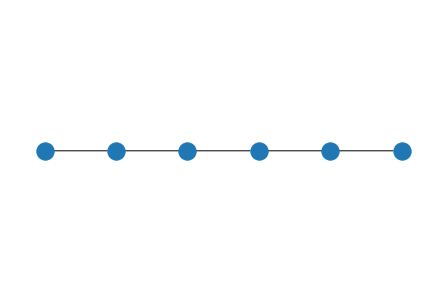

In [2]:
num_nodes = 6
boundary_condition = 'open'
line = LineLattice(
    num_nodes = num_nodes,
    boundary_condition=boundary_condition
)

line.draw()

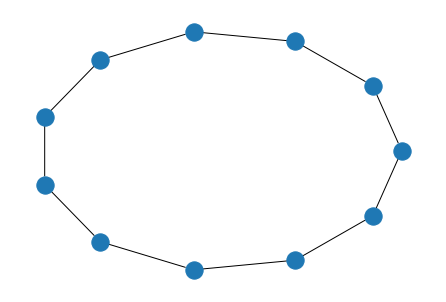

In [3]:
num_nodes = 11
boundary_condition = 'periodic' # `boundary_condition` must be 'open' or 'periodic'.
line_p = LineLattice(
    num_nodes = num_nodes,
    boundary_condition=boundary_condition
)

line_p.draw()

# `SquareLattice`
`SquareLattice` provides a two-dimensional lattice.

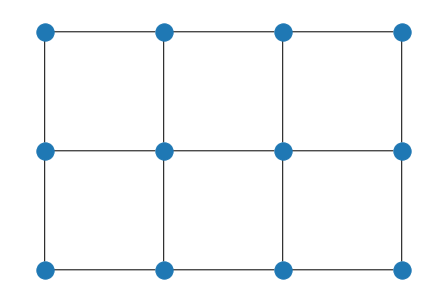

In [4]:
rows = 4
cols = 3
boundary_condition = 'open'
square = SquareLattice(
    rows=rows,
    cols=cols,
    boundary_condition=boundary_condition
)

square.draw()

The boundary conditions can be specified for each direction.

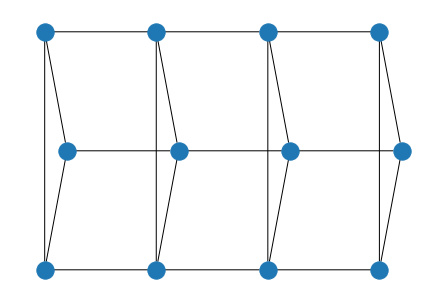

In [5]:
rows = 4
cols = 3
boundary_condition = ('open', 'periodic') # open in the x-direction, periodic in the y-direction
square_op = SquareLattice(
    rows=rows,
    cols=cols,
    boundary_condition=boundary_condition
)

square_op.draw()

# `HyperCubicLattice`
`HypercubicLattice` provides a $d$-dimensional lattice.

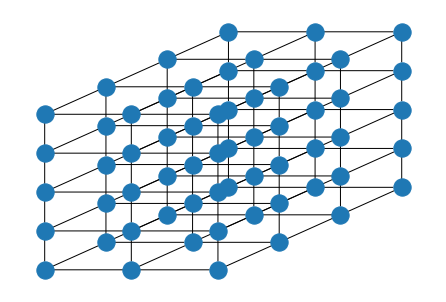

In [6]:
size = (3, 4, 5)
boundary_condition = ('open', 'open', 'open')
hypercubic = HyperCubicLattice(
    size=size,
    boundary_condition=boundary_condition
)

# function for setting the positions
def indextocoord_3d(index:int, size:tuple, angle) -> list:
    z = index // (size[0]*size[1])
    a = index % (size[0]*size[1])
    y = a // size[0]
    x = a % size[0]
    vec_x = np.array([1, 0])
    vec_y = np.array([np.cos(angle), np.sin(angle)])
    vec_z = np.array([0, 1])
    return_coord = x*vec_x + y*vec_y + z*vec_z
    return return_coord.tolist()

pos = dict([(index, indextocoord_3d(index, size, angle=pi/4)) for index in range(np.prod(size))])

hypercubic.draw(pos=pos)

# `TriangularLattice`
`TriangularLattice` provides a triangular lattice, which is a two-dimensional lattice with diagonal edges.

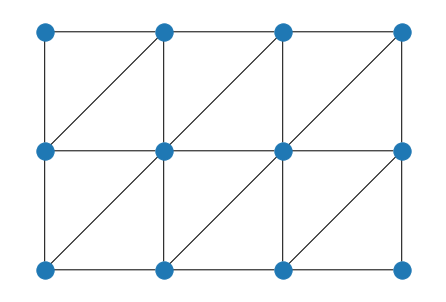

In [7]:
rows = 4
cols = 3
boundary_condition = 'open'

triangular = TriangularLattice(
    rows=rows,
    cols=cols,
    boundary_condition=boundary_condition
)

triangular.draw()

# The Fermi-Hubbard model (FHM)
## The Hamiltonian of the FHM is defined as  
## $H = \sum_{i, j} \sum_{\sigma = \uparrow, \downarrow} t_{i,j} c_{i, \sigma}^\dagger c_{j, \sigma} + U \sum_{i} n_{i, \uparrow} n_{i, \downarrow}$  
- $t_{i, j}$ : Hopping matrix, which is equivalent to the adjacency matrix of a given lattice.  
- $c_{i, \sigma}^\dagger, c_{i, \sigma}$ : Creation and anihillation operators of fermions on a lattice site $i$ with spin $\sigma$  
  - $c_{i, \sigma}^\dagger c_{j, \tau} + c_{j, \tau} c_{i, \sigma}^\dagger = \delta_{i, j} \delta_{\sigma, \tau}$  
  - $c_{i, \sigma} c_{j, \tau} + c_{j, \tau} c_{i, \sigma} = c_{i, \sigma}^\dagger c_{j, \tau}^\dagger + c_{j, \tau}^\dagger c_{i, \sigma}^\dagger = 0$  
- $n_{i, \sigma} = c_{i, \sigma}^\dagger c_{i, \sigma}$  
- $U$ : Parameter of the Coulomb-interaction

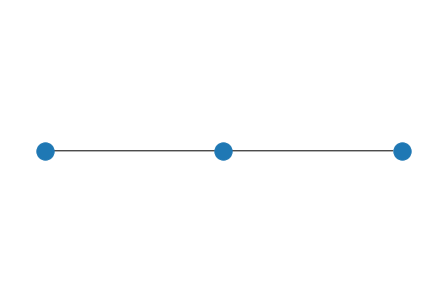

In [8]:
line = LineLattice(
    num_nodes=3,
    boundary_condition='open'
)

line.draw()

t = -1.0
t_onsite = 0.0
U = 5.0

fhm = FermiHubbardModel.uniform_parameters(
    lattice=line,
    uniform_hopping=t, 
    uniform_onsite_potential=t_onsite, 
    onsite_interaction=U)

## `FermionicOp` representation
### '-' = $c$
### '+' = $c^\dagger$
### 'N' = $n = c^\dagger c$
### 'I' = identity
- example
    - ('+-III', (-1+1j)) $\rightarrow$ $(-1 + 1j)* c_{0}^\dagger c_{1}$
    - ('IINII, (1 + 0j)) $\rightarrow$ $n_{2} = c_{2}^\dagger c_{2}$  
- Note
    - The number of fermionic operators required is twice of the number of lattice sites because of the spin degrees of freedom.
    - In the implementation, even indexes correspond to up-spin and odd indexes to down-spin.

In [9]:
FermionicOp.set_truncation(0)
print(fhm.second_q_ops(display_format='sparse'))

Fermionic Operator
register length=6, number terms=17
  (-1+0j) * ( +_0 -_2 )
+ (1+0j) * ( -_0 +_2 )
+ (-1+0j) * ( +_2 -_4 )
+ (1+0j) * ( -_2 +_4 )
+ 0j * ( +_0 -_0 )
+ 0j * ( +_2 -_2 )
+ 0j * ( +_4 -_4 )
+ (-1+0j) * ( +_1 -_3 )
+ (1+0j) * ( -_1 +_3 )
+ (-1+0j) * ( +_3 -_5 )
+ (1+0j) * ( -_3 +_5 )
+ 0j * ( +_1 -_1 )
+ 0j * ( +_3 -_3 )
+ 0j * ( +_5 -_5 )
+ (5+0j) * ( +_0 -_0 +_1 -_1 )
+ (5+0j) * ( +_2 -_2 +_3 -_3 )
+ (5+0j) * ( +_4 -_4 +_5 -_5 )


$$
\begin{align*}
H &= - c_{0, \uparrow}^\dagger c_{1, \uparrow} + c_{0, \uparrow} c_{1, \uparrow}^\dagger
- c_{1, \uparrow}^\dagger c_{2, \uparrow} + c_{1, \uparrow} c_{2, \uparrow}^\dagger  - c_{0, \downarrow}^\dagger c_{1, \downarrow} + c_{0, \downarrow} c_{1, \downarrow}^\dagger
- c_{1, \downarrow}^\dagger c_{2, \downarrow} + c_{1, \downarrow} c_{2, \downarrow}^\dagger \\
& + 5.0 n_{0, \uparrow} n_{0, \downarrow} + 5.0 n_{1, \uparrow} n_{1, \downarrow} + 5.0 n_{2, \uparrow} n_{2, \downarrow}
\end{align*}
$$

$$
\begin{align*}
\rightarrow H & = - c_{0}^\dagger c_{2} + c_{0} c_{2}^\dagger
- c_{2}^\dagger c_{4} + c_{2} c_{4}^\dagger - c_{1}^\dagger c_{3} + c_{1} c_{3}^\dagger
- c_{3}^\dagger c_{5} + c_{3} c_{5}^\dagger \\
& + 5.0 n_{0} n_{1} + 5.0 n_{2} n_{3} + 5.0 n_{4} n_{5}
\end{align*}
$$

# VQE of the FHM

In [10]:
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import RealAmplitudes
from qiskit.opflow import AerPauliExpectation
from qiskit.providers.aer import AerSimulator

In [11]:
# make a lattice
line = LineLattice(
    num_nodes=3,
    boundary_condition='open'
)

# the FHM
t = -1.0
t_onsite = 0.0
U = 5.0

fhm = FermiHubbardModel.uniform_parameters(
    lattice=line,
    uniform_hopping=t,
    uniform_onsite_potential=t_onsite,
    onsite_interaction=U
)

# the FHM in terms of `FermionicOp`
ham = fhm.second_q_ops(display_format='sparse')
print(ham.reduce())

# convert the Hamiltonian to qubits
qubit_converter = QubitConverter(mapper=JordanWignerMapper())
qubit_op = qubit_converter.convert(ham)

# define the quantum circuit
circ = RealAmplitudes(num_qubits=ham.register_length, reps=2)
print('Quantum circuit')
print(circ.decompose().draw())

# make the vqe instance
vqe = VQE(
    ansatz=circ,
    optimizer=SLSQP(),
    expectation=AerPauliExpectation(),
    max_evals_grouped=9999,
    quantum_instance=AerSimulator()
            )

result = vqe.compute_minimum_eigenvalue(operator=qubit_op)
energy = np.real(result.eigenvalue)

print(f'Energy: {energy}')

Fermionic Operator
register length=6, number terms=11
  (-1+0j) * ( +_0 -_2 )
+ (1+0j) * ( -_0 +_2 )
+ (-1+0j) * ( +_1 -_3 )
+ (1+0j) * ( -_1 +_3 )
+ (-1+0j) * ( +_2 -_4 )
+ (1+0j) * ( -_2 +_4 )
+ (-1+0j) * ( +_3 -_5 )
+ (1+0j) * ( -_3 +_5 )
+ (5+0j) * ( +_4 -_4 +_5 -_5 )
+ (5+0j) * ( +_2 -_2 +_3 -_3 )
+ (5+0j) * ( +_0 -_0 +_1 -_1 )
Quantum circuit
     ┌──────────┐                                             ┌──────────┐     »
q_0: ┤ Ry(θ[0]) ├──■────■─────────■─────────■──────────────■──┤ Ry(θ[6]) ├─────»
     ├──────────┤┌─┴─┐  │         │         │              │  └──────────┘     »
q_1: ┤ Ry(θ[1]) ├┤ X ├──┼────■────┼────■────┼─────────■────┼────────────────■──»
     ├──────────┤└───┘┌─┴─┐┌─┴─┐  │    │    │         │    │                │  »
q_2: ┤ Ry(θ[2]) ├─────┤ X ├┤ X ├──┼────┼────┼────■────┼────┼───────■────────┼──»
     ├──────────┤     └───┘└───┘┌─┴─┐┌─┴─┐  │  ┌─┴─┐  │    │       │        │  »
q_3: ┤ Ry(θ[3]) ├───────────────┤ X ├┤ X ├──┼──┤ X ├──┼────┼───────┼────────┼──»
 